In [1]:
%matplotlib inline

from modsim import *

from pandas import read_csv

filename = 'india_2.csv'
table = read_csv(filename, header=0, index_col=0, decimal='M')



In [2]:
system = System(alpha = 0.025, beta = -0.00185, plus = 449480608)

In [3]:
table.columns = ['avg_pop']

In [4]:
def plotting(x_1, x_2):
    newfig()
    
    plot(x_1, ':', color='darkblue', label='Simulation')
    plot(x_2, ':', color='red', label='Data')
    decorate(xlabel='Year',
    ylabel='World Population')

In [5]:
first_year = table.avg_pop.index[0]
last_year = table.avg_pop.index[-1]

avg_pop = table.avg_pop

first_year

1960

In [6]:
avg_pop[1960]

449480608

In [7]:

def slope(recent_year = 2016, past_year = 1960):
    
    
    pop_difference = avg_pop[recent_year] - avg_pop[past_year]
    elapsed_time = recent_year - past_year
    annual_growth = pop_difference / elapsed_time
    
    return annual_growth
    print('Annual Growth:', annual_growth)
    
    
annual_growth = slope()
annual_growth

15619477.607142856

In [8]:
def simulating_pop_linear(starting_year = 1960, ending_year = 2016):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + annual_growth
        
    
    return results

    
calculated_pop_linear = simulating_pop_linear()

In [9]:
system = System(alpha = 0.025, beta = -0.00185, plus = 449480608)

def simulating_pop_quadratic(starting_year = 1960, ending_year = 2016):
    
    results = TimeSeries()
    results[starting_year] = avg_pop[starting_year]
    
    for t in linrange(starting_year, ending_year):
        results[t + 1] = results[t] + system.alpha * results[t]
        print(results[t+1])
        
    
    return results
    
    

calculated_pop_quadratic = simulating_pop_quadratic()

460717623.2
472235563.78
484041452.874
496142489.196
508546051.426
521259702.712
534291195.28
547648475.162
561339687.041
575373179.217
589757508.697
604501446.415
619613982.575
635104332.139
650981940.443
667256488.954
683937901.178
701036348.707
718562257.425
736526313.861
754939471.707
773812958.5
793158282.462
812987239.524
833311920.512
854144718.525
875498336.488
897385794.9
919820439.772
942815950.767
966386349.536
990546008.274
1015309658.48
1040692399.94
1066709709.94
1093377452.69
1120711889.01
1148729686.23
1177447928.39
1206884126.6
1237056229.76
1267982635.51
1299682201.4
1332174256.43
1365478612.84
1399615578.16
1434605967.62
1470471116.81
1507232894.73
1544913717.09
1583536560.02
1623124974.02
1663703098.37
1705295675.83
1747928067.73
1791626269.42
1836416926.16


Saving figure to file Population_Estimate_1_linear.pdf


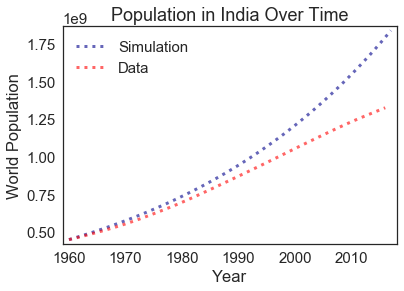

In [10]:
#QUADRATIC PLOTTING
plotting(calculated_pop_quadratic, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_linear.pdf')

Saving figure to file Population_Estimate_1_linear.pdf


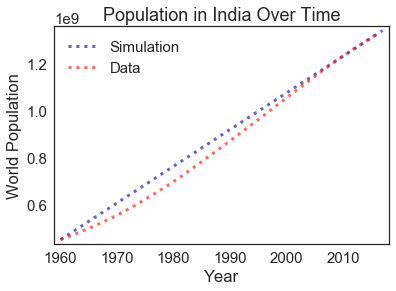

In [11]:
#LINEAR PLOTTING
plotting(calculated_pop_linear, avg_pop)
decorate(title='Population in India Over Time')
savefig('Population_Estimate_1_linear.pdf')

In [12]:
def simulate_until_pop(pop_limit = 1500000):
    
    results = TimeSeries()
    results[first_year] = avg_pop[first_year]
    
    
